## NHS Post processing Library

This notebook provides examples on how to carry out data evaluation, visualization and analysis using the post_processing python library. Be sure to go through the [Quick Start](https://nhs-postprocessing.readthedocs.io/en/latest/QuickStart.html) section of the [documentation](https://nhs-postprocessing.readthedocs.io/en/latest/index.html) for instructions on how to access and import the libary and its packages.

##### Note: 
The Library is still under active development and empty sections will be completed in Due time

### Table of content
- Requirements
- Data Manipulation(generating and obtaining the Dataframes required)
- Analysis
- Visualizations


##### All files are available in the docs/source/notebooks folder where the notebook is located

### Requirements

The conda environmnent contains all libraries associated the post processing library. After setting up the conda environment, you only have to import the metrics and visualization modules from postprocessinglib.evaluation

In [1]:
### Remove and modify these later.
import sys
import pandas as pd
sys.path.append("../../../")

In [2]:
from postprocessinglib.evaluation import data, metrics, visuals
# from postprocessinglib.utilities import helper_functions as hlp

From this point on, the function you use will depend on which project you are working on and what sort of data i.e., the datatype of the data, you have.

### DATA MANIPULATION

### MESH CSV files

Assuming you have a csv file containing an csv file with observed and simulated values for a list of stations of the form:
| Some datetime  | station1_obs | station1_sim | station2_obs | station2_sim |
| -------------- | ------------ | ------------ | ------------ | ------------ | 

We simply pass it into our generate dataframes function as shown below:


In [3]:
# passing a controlled csv file for testing
path = "MESH_output_streamflow_3.csv"

# assuming the simulation model needs 365 days to warm up and account for errors during the learning phase.
DATAFRAMES = data.generate_dataframes(csv_fpaths=path, warm_up=365)

for key, value in DATAFRAMES.items():
    print(f"{key}")
for key, value in DATAFRAMES.items():
    print(f"{key}:\n{value}")

All Observed rows are consistent across DataFrames.
DF_1
DF_OBSERVED
DF_SIMULATED_1
DF_MERGED
DF_1:
            QOMEAS_05AA024  QOSIM_05AA024  QOMEAS_05AB046  QOSIM_05AB046  \
1982-10-02           15.00      12.727950             NaN       2.151088   
1982-10-03           14.80      12.070300             NaN       1.282258   
1982-10-04           15.20      11.928440             NaN       0.864993   
1982-10-05           15.00      11.873910             NaN       0.662052   
1982-10-06           14.10      11.845160             NaN       0.560041   
...                    ...            ...             ...            ...   
2016-12-27            8.62       0.626161             NaN       0.426263   
2016-12-28            8.64       0.619734             NaN       0.425050   
2016-12-29            8.63       0.612944             NaN       0.423842   
2016-12-30            8.64       0.606437             NaN       0.422638   
2016-12-31            8.61       0.599758             NaN       

In this case, because we dont pass in aggregation parameters, we end up with the three default dataframnes in our dictionary; the merged dataframe, the observed data and the simulated data

In [4]:
# print("The Merged dataframe: \n")
# print(DATAFRAMES["DF_1"])
# print("The Observed dataframe: \n")
# print(DATAFRAMES["DF_OBSERVED"])
# print("\nThe Simulated dataframe: \n")
# print(DATAFRAMES["DF_SIMULATED"])
print(DATAFRAMES["DF_SIMULATED_1"])

            QOSIM_05AA024  QOSIM_05AB046  QOSIM_05AC003  QOSIM_05AD007  \
1982-10-02      12.727950       2.151088       1.452520      41.470610   
1982-10-03      12.070300       1.282258       1.230331      28.868720   
1982-10-04      11.928440       0.864993       1.087916      23.806940   
1982-10-05      11.873910       0.662052       0.993243      21.888450   
1982-10-06      11.845160       0.560041       0.918875      21.085320   
...                   ...            ...            ...            ...   
2016-12-27       0.626161       0.426263       0.341739       6.993578   
2016-12-28       0.619734       0.425050       0.339073       6.978570   
2016-12-29       0.612944       0.423842       0.336443       6.963836   
2016-12-30       0.606437       0.422638       0.333846       6.949335   
2016-12-31       0.599758       0.421438       0.331275       6.935077   

            QOSIM_05AE006  QOSIM_05AG006  QOSIM_05AH005  QOSIM_05AJ001  \
1982-10-02       7.882280      82.633

The Simulated and Observed dataframes are particularly important in the calculation of our metrics

In [5]:
# You are also  able to generate the dataframes for a given period of time i.e from a start date, till an end date
# and everything in between
DATAFRAMES_January2010 = data.generate_dataframes(csv_fpath=path, warm_up=365, start_date='2010-01-01' , end_date='2010-1-31')
DATAFRAMES_till2009 = data.generate_dataframes(csv_fpath=path, warm_up=365, end_date='2009-12-31')
DATAFRAMES_from1995 = data.generate_dataframes(csv_fpath=path, warm_up=365, start_date='1995-01-01')

TypeError: generate_dataframes() got an unexpected keyword argument 'csv_fpath'

In [ ]:
print("The Merged dataframe for January 2010: \n")
print(DATAFRAMES_January2010["DF"])
print("The Observed dataframe for January 2010: \n")
print(DATAFRAMES_January2010["DF_OBSERVED"])
print("\nThe Simulated dataframe for January 2010: \n")
print(DATAFRAMES_January2010["DF_OBSERVED"])

In [ ]:
print("The Merged dataframe until 2009: \n")
print(DATAFRAMES_till2009["DF"])
print("The Observed dataframe until 2009: \n")
print(DATAFRAMES_till2009["DF_OBSERVED"])
print("\nThe Simulated dataframe until 2009: \n")
print(DATAFRAMES_till2009["DF_SIMULATED"])

In [ ]:
print("The Merged dataframe from 1995: \n")
print(DATAFRAMES_from1995["DF"])
print("The Observed dataframe from 1995: \n")
print(DATAFRAMES_from1995["DF_OBSERVED"])
print("\nThe Simulated dataframe from 1995: \n")
print(DATAFRAMES_from1995["DF_SIMULATED"])

You are also able to go a step further by aggregating your data right from the beggining by using the optional arguments 

In [ ]:
## Lets use a time period of 1981 to 1990 to demonstrate this
DATAFRAMES = data.generate_dataframes(csv_fpath=path, warm_up=365, start_date = "1981-01-01", end_date = "1990-12-31",
                                      # optional arguments
                                      # lets see a weekly aggregation
                                      daily_agg = True, da_method = 'min',
                                      # lets see a weekly aggregation
                                      weekly_agg = True, wa_method = 'min',
                                      # lets also see monthly aggregation
                                      monthly_agg = True, ma_method = 'inst',
                                      # lets also see yearly aggregation
                                      yearly_agg = True, ya_method = 'sum'
                                      # note that without inputing the respective methods,
                                      # the functions default to mean as the method of aggregation
                                     )
for key, value in DATAFRAMES.items():
    print(f"{key}:\n{value}")
    
# You can uncomment these lines to help with manual confirmation of the data generated 
# DATAFRAMES["DF_WEEKLY"].to_csv('weekly_df.csv')
# DATAFRAMES["DF_MONTHLY"].to_csv('monthly_df.csv')
# DATAFRAMES["DF_YEARLY"].to_csv('yearly_df.csv')

Observe how the methods inputed dictate the means of aggregation

We are also able to obtain a seasonal period from this step as show below 

In [ ]:
DATAFRAMES = data.generate_dataframes(csv_fpath=path, warm_up=365, start_date = "1981-01-01", end_date = "1990-12-31",
                                      # seasonal aggregation
                                      # obtaining the month of January from every year from 1981 to 1985
                                      seasonal_p = True, sp_dperiod = ('04-01', '08-30'),
                                      sp_subset = ('1981-01-01', '1985-12-31')
                                      # if the time range is not specified, it will return the daily period
                                      # for the whole data whose time frame might be specified by the start and
                                      # end date parameters
                                     )
for key, value in DATAFRAMES.items():
    print(f"{key}:\n{value}")

# You can uncomment this line to help with manual confirmation of the data generated 
# DATAFRAMES["DF_CUSTOM"].to_csv('seasonal_df.csv')
# DATAFRAMES["DF_CUSTOM"].head(40)

Again observe how there is always an observed and simulated dataframe

If the above weekly and daily aggregations werent done at the beginning you are also able to do them whenever you want during your evaluation using their respective functions 

In [ ]:
# calculating the daily aggregate outside the generate dataframe function
merged_df = DATAFRAMES["DF"]
print(merged_df)
print(data.daily_aggregate(df=merged_df))

In [ ]:
# We are also able to do the same weekly...
# Recall that the default method is mean
print(data.weekly_aggregate(df=merged_df, method="min"))

In [ ]:
# Monthly...
print(data.monthly_aggregate(df=merged_df, method="inst"))

In [ ]:
# Yearly...
print(data.yearly_aggregate(df=merged_df, method="sum"))

In [ ]:
# and we are also able to obtaining a customized seasonal period from every year in a period...
print(data.seasonal_period(df=merged_df, daily_period=('01-01', '01-31'), subset = ('1981-01-01', '1985-12-31')))

In [ ]:
# and we are also able to obtaining a customized seasonal period or from select years...
print(data.seasonal_period(df=merged_df, daily_period=('01-01', '01-31'), years = [1981, 1983, 1990]))

Finally, we are able to extract each station from the data

In [ ]:
## for ease of code I will rename the variables
DATAFRAMES = data.generate_dataframes(csv_fpath=path, warm_up=365)
observed = DATAFRAMES["DF_OBSERVED"]
simulated = DATAFRAMES["DF_SIMULATED"]

In [ ]:
# You are also able to split the data into their respective stations in the cases where you might want to do so
for station in data.station_dataframe(observed=observed, simulated=simulated):
    print(station)

<mark>Note: As it stands, that is the only kind of data that we it is currently able to handle. In future releases, It will be able to handle more file types including, netcdf file, shape file, arrays, and more.<mark/>

### Analysis

Because the library is in active development, there will be regular removals and additions to its features. As a rule of thumb therefore it is always a good idea to check what it can do at the time of use.

In [ ]:
# We do this by calling on its available metrics
for metric in metrics.available_metrics():
    print(metric)

Now that we know what it can currently do, we know what we want to ask for.

##### Mean Square Error

In [ ]:
# Mean square error for the first station in the data we were given
print(metrics.mse(observed=observed, simulated=simulated))

##### Root Mean Square Error

In [ ]:
# lets calculate for the root mean square error for the first station in the data we were given
# The syntax goes:-
print(metrics.rmse(observed=observed, simulated=simulated))

##### Mean Average Error

In [ ]:
# Similarly, the mean absolute error for the first station in the data we were given will look like 
print(metrics.mae(observed=observed, simulated=simulated))

##### Nash-Sutcliffe Efficiency

In [ ]:
# Similarly, the Nash-Sutcliffe Efficiency for the first station in the data we were given will look like 
print(metrics.nse(observed=observed, simulated=simulated))

##### Kling-Gupta Efficiency

In [ ]:
# Similarly, the Kling-Gupta Efficiency for the first station in the data we were given will look like 
print(metrics.kge(observed=observed, simulated=simulated))

##### The Updated Kling-Gupta Efficiency (2012)

In [ ]:
# Similarly, the Kling-Gupta Efficiency for the first station in the data we were given will look like 
print(metrics.kge_2012(observed=observed, simulated=simulated))

##### Percentage Bias

In [ ]:
# Similarly, the Percentage Bias for the first station in the data we were given will look like 
print(metrics.bias(observed=observed, simulated=simulated))

# Observed that it returns the percentage not the actual value i.e 27% not 0.27

##### Time to Peak

In [ ]:
# Similarly, the Time to Peak for the simulated data from the first station in the data we were given will look like 
print(metrics.time_to_peak(df=simulated))

# The time to peak for the observed data for the same station looks like:-
print(metrics.time_to_peak(df=observed))

##### Time to Centre of Mass

In [ ]:
# Similarly, the Time to Peak for the simulated data from the first station in the data we were given will look like 
print(metrics.time_to_centre_of_mass(df=simulated))

# The time to peak for the observed data for the same station looks like:-
print(metrics.time_to_centre_of_mass(df=observed))

##### Spring Pulse Onset Delay

In [ ]:
# Similarly, the Time to Peak for the simulated data from the first station in the data we were given will look like 
print(metrics.SpringPulseOnset(df=simulated))

# The time to peak for the observed data for the same station looks like:-
print(metrics.SpringPulseOnset(df=observed))

##### Multiple metrics

In [ ]:
# You are also able to calculate possible available metrics 
for key, value in metrics.calculate_all_metrics(observed=observed, simulated=simulated).items():
    print(f"{key}: {value}")

Note: There will be an option to have this returned in a text file for easy observation in the coming days

In [ ]:
# Naturally, you are also able to calculate a few metrics at a time but putting then in a list and passing them into the function
# as shown below
metrices = ["MSE", "RMSE", "MAE", "NSE", "NegNSE", "LogNSE"]
for key, value in metrics.calculate_metrics(observed=observed, simulated=simulated, metrices=metrices).items():
    print(f"{key}: {value}")

### Visualizations

<mark>Note: The visualization modules are still under review<mark/>

In [ ]:
visuals.plot(
    # merged_df = DATAFRAMES["DF"]['1981-01-01':'1990-12-31'],
    df = DATAFRAMES["DF_SIMULATED"]['1981-01-01':'1990-12-31'],
    title='Hydrograph of the time series from 1981-1990',
    # linestyles=['r-', 'b-'],
    linestyles=['c-'],
    labels=['Datetime', 'Streamflow'],
    metrices=['KGE'],
    # linewidth = [.75, 1.25],
    linewidth = [1.25],
    )

In [ ]:
sim_monthly = data.monthly_aggregate(df=simulated)
obs_monthly = data.monthly_aggregate(df=observed)
Stations_by_monthly = data.station_dataframe(observed=obs_monthly, simulated=sim_monthly)
# plot of the second station in the dataframe within the time period aggregated monthly by mean(default)
# visuals.plot(merged_df = Stations_by_monthly[0]['1981-01':'1990-12'],
#             title='Hydrograph of the time series aggregated monthly from 1981-1990',
#             linestyles=['r-', 'b-'],
#             labels=['Datetime', 'Streamflow'],
#             metrices=['RMSE', 'MSE', 'PBIAS'],
#             grid = True
#             )
Stations_by_monthly

In [ ]:
visuals.scatter(merged_df = DATAFRAMES['DF']['1981-01-01':'1985-01-31'],
               grid = True,
               labels = ("Simulated", "Observed"),
               markerstyle = 'b.',
               title = "Scatterplot of January 1981 to January 1985",
               line45 = True,
               metrices = ['KGE', 'RMSE'],
               )

In [ ]:
# There is an optional dependency required with using read_excel so first we install it
# !pip install openpyxl

path_output_2 = "MESH_output_streamflow_2.csv"
path_input_2 = "Station_data.xlsx"


#### Newer data
DATA_2 = data.generate_dataframes(csv_fpath=path_output_2, warm_up=365,
                                 # long term
                                 long_term = True, lt_method = ["q33.33", "median" ,'q75' ,'Q25' ,'q33' ],)
Stations_2 = pd.read_excel(io=path_input_2)

ignore = []
for i in range(0, len(Stations_2)):
    if Stations_2['Properties'][i] == 'X':
        ignore.append(i)

Stations_2 = Stations_2.drop(Stations_2[Stations_2['Properties'] == 'X'].index)
Stations_2 = Stations_2.set_index('Station Number')

for i in reversed(ignore):
    DATA_2['DF'] = DATA_2['DF'].drop(columns = DATA_2['DF'].columns[[2*i, 2*i+1]])
    DATA_2["DF_OBSERVED"] = DATA_2["DF_OBSERVED"].drop(columns = DATA_2['DF_OBSERVED'].columns[i])
    DATA_2['DF_SIMULATED']  = DATA_2["DF_SIMULATED"].drop(columns = DATA_2['DF_SIMULATED'].columns[i]) 


In [ ]:
shapefile_path = r"SaskRB_SubDrainage2.shp"

visuals.scatter(shapefile_path = shapefile_path,
                        title = "SRB SubDrainage and KGE",
                        x_axis = Stations_2["Lon"],
                        y_axis = Stations_2["Lat"],
                        metric = "KGE",
                        fig_size = (24, 30),
                        observed = DATA_2["DF_OBSERVED"],
                        simulated = DATA_2["DF_SIMULATED"],
                        labels=['Longitude', 'Latitude'],
                cmap = 'jet', vmin = 0, vmax=0.5
                    )

In [ ]:
visuals.scatter(merged_df = DATAFRAMES['DF']['1981-01-01':'1985-01-31'],
               grid = True,
               labels = ("Simulated", "Observed"),
               markerstyle = 'b.',
               title = "Scatterplot of January 1981 to January 1985",
               line45 = True,
               metrices = ['KGE', 'RMSE'],
               )

In [ ]:
DATAFRAMES = data.generate_dataframes(csv_fpath=path_output_2, warm_up=365, start_date = "1981-01-01", end_date = "1990-12-31",
                                      # optional arguments
                                      # lets see a weekly aggregation
                                      daily_agg = True, da_method = 'min',
                                      # lets see a weekly aggregation
                                      weekly_agg = True, wa_method = 'min',
                                      # lets also see monthly aggregation
                                      monthly_agg = True, ma_method = 'inst',
                                      # lets also see yearly aggregation
                                      yearly_agg = True, ya_method = 'sum',
                                      # seasonal aggregation
                                      # obtaining the month of January from every year from 1981 to 1985
                                      seasonal_p = True, sp_dperiod = ('04-01', '08-30'),
                                      sp_subset = ('1981-01-01', '1985-12-31'),
                                      # long term
                                      long_term = True, lt_method = ["q33.33", "median" ,'q75' ,'Q25' ,'q33' ],
                                     )
for key, value in DATAFRAMES.items():
    print(f"{key}:\n{value}")

In [ ]:
visuals.bounded_plot(
    lines = merged_df,
    upper_bounds = upper_bounds,
    lower_bounds = lower_bounds,
    title=['05AD007-OLDMAN RIVER NEAR LETHBRIDGE'],
    linestyles=['b-', 'r-'],
    labels=['Datetime', 'Streamflow'],
    grid=True,
    transparency = [0.3, 0.3],
    )

In [ ]:
visuals.scatter(merged_df = DATAFRAMES['DF']['1990-01-01':'1990-12-31'].iloc[:, [10, 11]],
labels=("Observed", "Simulated"),
title="Scatter Plot Example",
   grid=True,
    metrices = ['KGE','RMSE'],
   line45=True,
  markerstyle = 'b.',

               )

In [ ]:
visuals.bounded_plot(
    lines = DATA_2["LONG_TERM_MEDIAN"].iloc[:, [8,9]],
    upper_bounds = [DATA_2["LONG_TERM_MAX"].iloc[:, [8,9]]],
    lower_bounds = [DATA_2["LONG_TERM_MIN"].iloc[:, [8,9]]],
    # upper_bounds = [DATAFRAMES["LONG_TERM_Q75"]],
    # lower_bounds = [DATAFRAMES["LONG_TERM_Q25"]],
#     title=['Long Term Aggregation by days of the Year', 12.55],
    linestyles=['b', 'r-'],
    labels=['Datetime', 'Streamflow'],
    grid=True,
    transparency = [0.4, 0.3],
    )

In [ ]:
visuals.bounded_plot(
  lines = merged_df,
  upper_bounds = upper_bounds,
  lower_bounds = lower_bounds,
  title=['Long Term Aggregation by days of the Year'],
  legend = ['Predicted Streamflow','Recorded Streamflow'],
  linestyles=['k', 'r-'],
  labels=['Days of the year', 'Streamflow Values'],
  transparency = [0.4, 0.7],
  save = True,
  save_as = "b_plot_1", dir= '../b_plots'
)

In [ ]:
visuals.qqplot(
    merged_df = DATAFRAMES["DF"]['1990-01-01':'1990-12-31'].iloc[:, [6,7, 8,9]],
    title=['05AD007 - OLDMAN RIVER NEAR LETHBRIDGE - 1990','05AG006 - OLDMAN RIVER NEAR THE MOUTH- 1990'],
    linestyle = ['b.','r-.','r-'],
    labels=["Quantiles (Simulated)", "Quantiles (Observed)"],
    linewidth = [.75, 1.25],
    legend = True, grid = True,
#     save = True
    )

In [ ]:
index = pd.date_range(start="2022-01-01", periods=50, freq="D")

In [ ]:
import numpy as np

In [ ]:

obs_df = pd.DataFrame({
"Station1": np.random.rand(50),
# "Station2": np.random.rand(50)
}, index=index)
# obs_df

In [ ]:
sim_df = pd.DataFrame({
"Station1": np.random.rand(50),
# "Station2": np.random.rand(50)
}, index=index)
# sim_df

In [ ]:
merged_df = pd.DataFrame({
    "obs": obs_df["Station1"],
    "sim": sim_df["Station1"]
})

In [ ]:
visuals.plot(merged_df = merged_df,
             title='Simulated vs Observed',
             labels=['Time', 'Value'],
             grid=True,
             metrices = ['KGE','RMSE'],
             save = True,
             save_as = "plot1_example",
             dir = "../Figures"
            )

In [ ]:
visuals.plot(obs_df = obs_df,
             sim_df = sim_df,
             linestyles=('g-', 'b-'),
             linewidth=(1.5, 1.25),
             save = True,
             save_as = "plot_example"
             dir = "./plots"
            )

In [ ]:
visuals.plot(df=obs_df,
             grid=True,
             title="Single Line Plot",
             labels=("Time", "Value"),
             legend = ['Single line Data']
             fig_size=(9, 5)
            )


In [ ]:
upper_bounds = [
   pd.DataFrame({
        "Obs_Upper": np.random.rand(50) + 0.1,
       "Sim_Upper": np.random.rand(50) + 0.1,
   }, index=index)
]


In [ ]:
lower_bounds = [
   pd.DataFrame({
        "Obs_Lower": np.random.rand(50) - 0.1,
       "Sim_Lower": np.random.rand(50) - 0.1,
   }, index=index)
]


In [ ]:
visuals.bounded_plot(
  lines=merged_df,
  upper_bounds=upper_bounds,
  lower_bounds=lower_bounds,
  legend=('Simulated Data', 'Observed Data'),
  title=['Observed Data'],
  labels=('Time', 'Flow'),
  grid=True,
#   save=False,
#   save_as = ''
)

In [ ]:
visuals.scatter(
     obs_df=obs_df,
   sim_df=sim_df,
     labels=("Observed", "Simulated"),
         title="Scatter Plot Example",
         best_fit=True,
         line45=True,
#          save=True,
#          save_as="scatter_plot_example.png"
     )

In [ ]:
visuals.qqplot(
    merged_df = merged_df,
#     title=['Title'],
#     linestyle = ['bo','r-.','r-'],
    labels=["Quantiles (Simulated)", "Quantiles (Observed)"],
    title="QQ Plot Example",
#     linewidth = [.75, 1.25],
#     legend = True,
#     grid = True,
    save=True,
    save_as="qqplot_example",
    dir = '../Figures'
)

In [ ]:
visuals.qqplot(
    merged_df = merged_df,
    title=['QQ plot'],
    linestyle = ['r*','b-.','k-'],
    labels=["Simulated", "Observed"],
    linewidth = [1.25, 1.25],
    legend = True,
    q_labels = ['Q Values',
                "Range of Q's",
                "Upper Band Quartile"],
    quantile = [75, 100],
    grid = True,
)

In [22]:
# passing a controlled csv file for testing
path = 'MESH_output_streamflow_3.csv'

DATAFRAMES = data.generate_dataframes(csv_fpath=path, warm_up=365, start_date = "1981-10-01", end_date = "2017-12-31",
#                                       # optional arguments
#                                       # lets see a weekly aggregation
                                      daily_agg = True, da_method = 'median',
#                                       # lets see a weekly aggregation
                                      weekly_agg = True, wa_method = 'median',
#                                       # lets also see monthly aggregation
                                      monthly_agg = True, ma_method = 'median',
#                                       # lets also see yearly aggregation
                                      yearly_agg = True, ya_method = 'median',
#                                       # note that without inputing the respective methods,
#                                       # the functions default to mean as the method of aggregation
#                                       seasonal_p = True, sp_dperiod = ('03-01', '08-30'),
#                                       sp_subset = ('1981-01-01', '2017-12-31')    # YYYY-MM-DD
                                     )
for key, value in DATAFRAMES.items():
    print(f"{key}")
for key, value in DATAFRAMES.items():
    print(f"{key}:\n{value.head}")

The start date for the Observed Data is 1982-10-02
The start date for the Simulated Data is 1982-10-02
The start date for the Merged Data is 1982-10-02
DF
DF_SIMULATED
DF_OBSERVED
DF_DAILY
DF_WEEKLY
DF_MONTHLY
DF_YEARLY
DF:
<bound method NDFrame.head of             QOMEAS_05AA024  QOSIM_05AA024  QOMEAS_05AB046  QOSIM_05AB046  \
1982-10-02           15.00      12.727950             NaN       2.151088   
1982-10-03           14.80      12.070300             NaN       1.282258   
1982-10-04           15.20      11.928440             NaN       0.864993   
1982-10-05           15.00      11.873910             NaN       0.662052   
1982-10-06           14.10      11.845160             NaN       0.560041   
...                    ...            ...             ...            ...   
2016-12-27            8.62       0.626161             NaN       0.426263   
2016-12-28            8.64       0.619734             NaN       0.425050   
2016-12-29            8.63       0.612944             NaN     

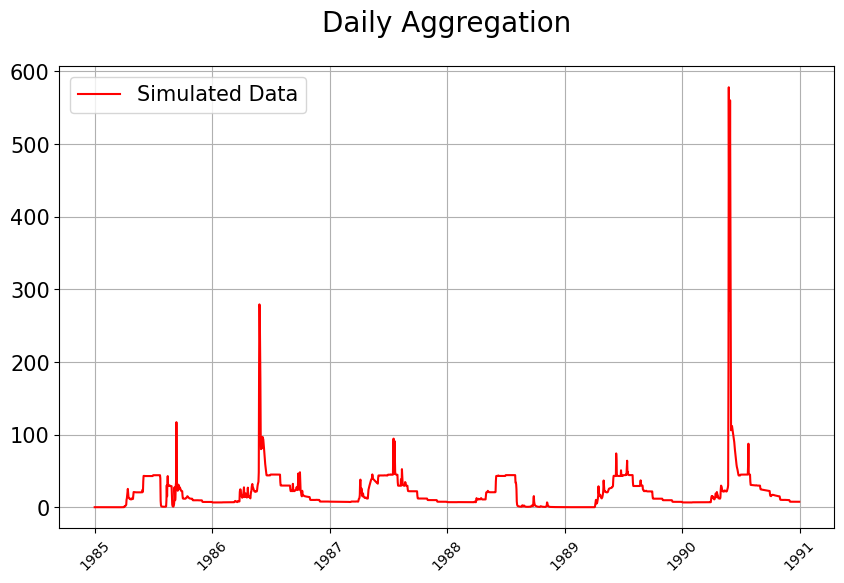

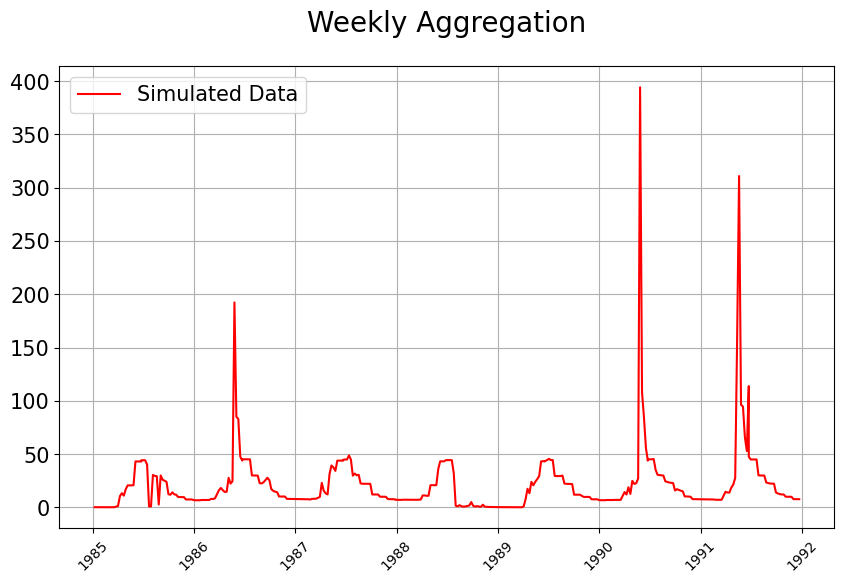

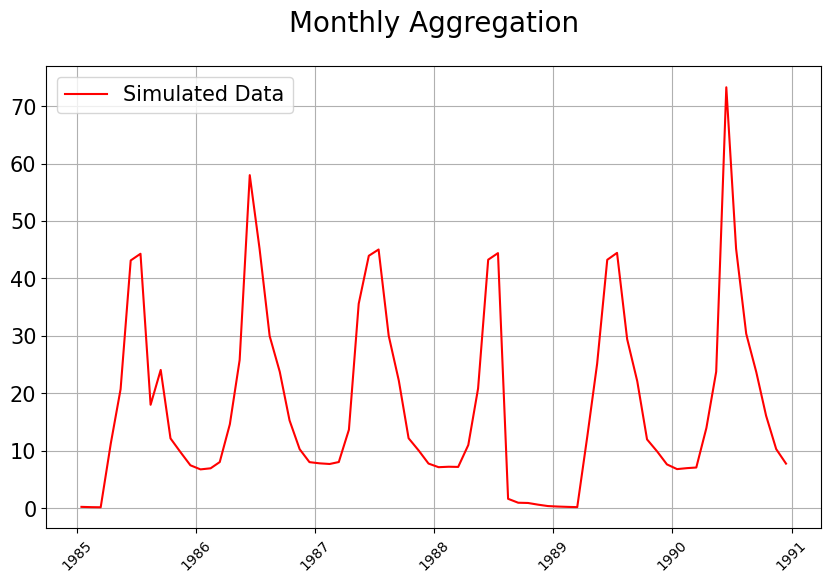

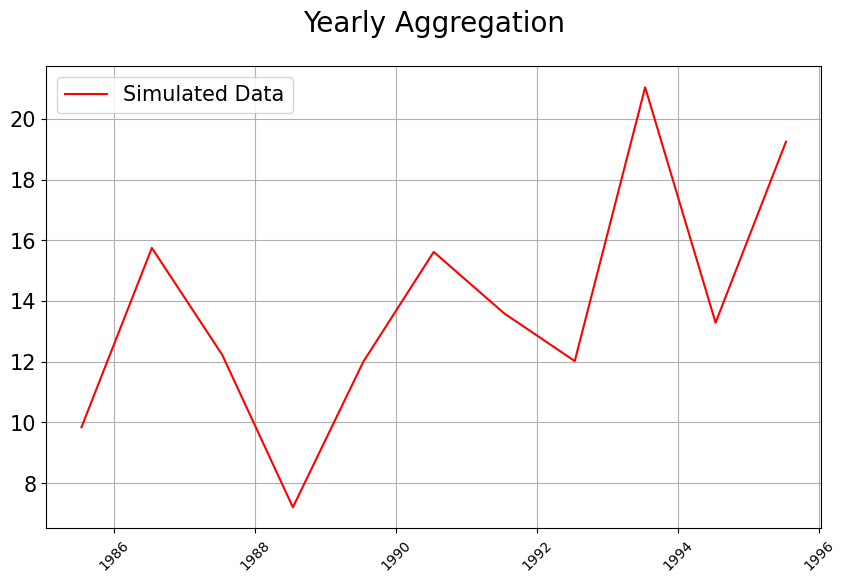

In [26]:
visuals.plot(
    df = DATAFRAMES["DF_SIMULATED"].iloc[:, [0]]['1985-01-01':'1990-12-31'],
    title='Daily Aggregation',
    grid=True,
#     save=True, save_as='d', dir='../',
#     metrices = 'all'
)

visuals.plot(
    df = DATAFRAMES["DF_WEEKLY"].iloc[:, [1]]['1985-01-01':'1991-12-31'],
    title='Weekly Aggregation',
    grid=True,
#     save=True, save_as='we', dir='../',
#     metrices = 'all'
)

visuals.plot(
    df = DATAFRAMES["DF_MONTHLY"].iloc[:, [1]]['1985-01-01':'1990-12-31'],
    title='Monthly Aggregation',
    grid=True,
#     save=True, save_as='m', dir='../',
#     metrices = 'all'
)

visuals.plot(
    df = DATAFRAMES["DF_YEARLY"].iloc[:, [1]]['1985-01-01':'1995-12-31'],
    title='Yearly Aggregation',
    grid=True,
#     save=True, save_as='y', dir='../',
#     metrices = 'all'
)

In [23]:
# importing matplotlib module 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import datetime
# plt.style.use('default') 

In [24]:
# Ensure the index is datetime
DATAFRAMES["DF_SIMULATED"].index = pd.to_datetime(DATAFRAMES["DF_SIMULATED"].index)
DATAFRAMES["DF_WEEKLY"].index = [pd.to_datetime(f"{int(float(week))}-W{int((float(week) - int(float(week))) * 100):02d}-1", format="%Y-W%U-%w") for week in DATAFRAMES["DF_WEEKLY"].index]
DATAFRAMES["DF_MONTHLY"].index = [pd.to_datetime(f"{month}-15") for month in DATAFRAMES["DF_MONTHLY"].index]
DATAFRAMES["DF_YEARLY"].index = [pd.Timestamp(f"{year}-07-15") for year in DATAFRAMES["DF_YEARLY"].index]

# def convert_fractional_year_to_datetime(fractional_year):
#     # Ensure the fractional year is a float
#     fractional_year = float(fractional_year)
    
#     # Extract the year (integer part) and the fractional part
#     year = int(fractional_year)  # Get the year from the integer part
#     week_fraction = fractional_year - year  # Get the fractional part (0.0-1.0)
    
#     # Convert the fractional part to a week number (assuming 52 weeks per year)
#     week = int(week_fraction * 52)  # Convert fractional part to week number (0-52)
    
#     # Create a datetime object from the year and week number
#     # This creates the datetime object for the first day of the given week
#     return pd.to_datetime(f"{year}-W{week:02d}-1", format="%Y-W%U-%w")

# DATAFRAMES["DF_WEEKLY"].index = [convert_fractional_year_to_datetime(year) for year in DATAFRAMES["DF_WEEKLY"].index]

<Figure size 3600x1500 with 0 Axes>

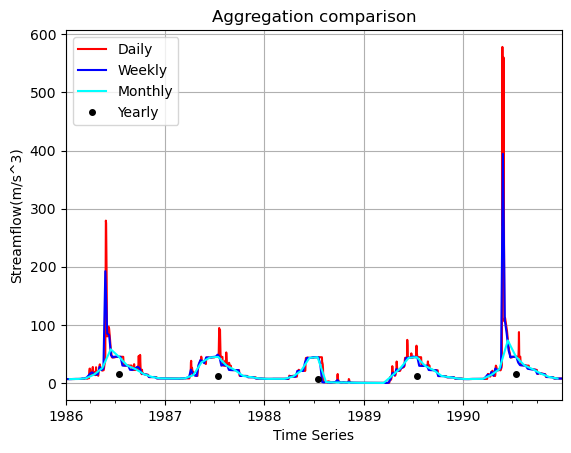

In [25]:
# to set the plot size 
plt.figure(figsize=(24, 10), dpi=150) 
  
# using plot method to plot open prices. 
# in plot method we set the label and color of the curve. 
ax = DATAFRAMES["DF_SIMULATED"].iloc[:, [0]]['1986-01-01':'1990-12-31'].plot(color='red') 
DATAFRAMES["DF_WEEKLY"].iloc[:, [1]]['1986-01-01':'1990-12-31'].plot(ax=ax, color='blue')
DATAFRAMES["DF_MONTHLY"].iloc[:, [1]]['1986-01-01':'1990-12-31'].plot(ax=ax, color='cyan') 
DATAFRAMES["DF_YEARLY"].iloc[:, [1]]['1986-01-01':'1990-12-31'].plot(ax=ax, linestyle='None', marker='o', color='black', markersize=4) 
  
# adding title to the plot 
plt.title('Aggregation comparison') 
  
# adding Label to the x-axis 
plt.xlabel('Time Series') 

# adding Label to the x-axis 
plt.ylabel('Streamflow(m/s^3)')
  
# adding legend to the curve 
plt.legend(labels=['Daily', 'Weekly', 'Monthly', 'Yearly'])

# Format the x-axis to show dates in a readable format
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # Set major ticks to each year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format the date to show the year

# Rotate the x-axis labels for readability
# plt.xticks(rotation=45)

plt.grid()

In [33]:
time = ['1982.52', '1982.53', '1965.45', '1988.00']
test = [pd.to_datetime(f"{int(float(week))}-W{int((float(week) - int(float(week))) * 100):02d}-3", format="%Y-W%U-%w") for week in time]

In [34]:
test

[Timestamp('1982-12-22 00:00:00'),
 Timestamp('1982-12-29 00:00:00'),
 Timestamp('1965-11-10 00:00:00'),
 Timestamp('1988-01-01 00:00:00')]

In [6]:
print(DATAFRAMES['DF_YEARLY'].index[0])

1982


In [27]:
(float('1982.45')-int(float('1982.45'))) *100

45.00000000000455